# 💓 Heart Disease Prediction using Logistic Regression
This notebook trains a logistic regression model on heart disease data and predicts the probability of heart disease for a custom person.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [9]:
# Load the dataset (ensure this CSV is uploaded in the same directory)
df = pd.read_csv("gvfVQW (1).csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


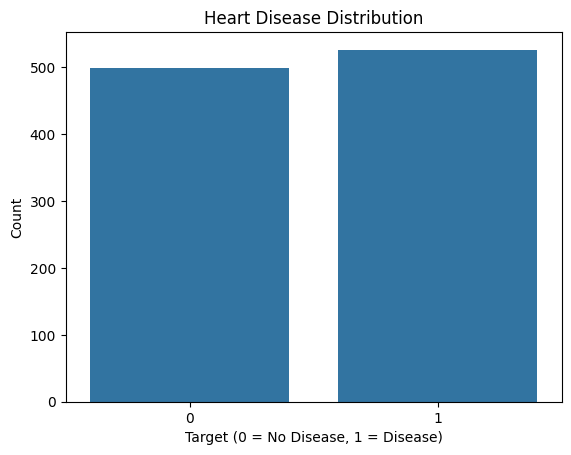

In [18]:
sns.countplot(data=df, x="target")
plt.title("Heart Disease Distribution")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()


In [10]:
# Split features and target
X = df.drop("target", axis=1)
y = df["target"]

In [11]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_scaled, y)

LogisticRegression()

## 🧍‍♂️ Enter the details of the person for prediction

In [13]:
# Example input (edit these values for custom prediction)
person_data = {
    "age": 55,
    "sex": 1,
    "cp": 0,
    "trestbps": 130,
    "chol": 250,
    "fbs": 0,
    "restecg": 1,
    "thalach": 160,
    "exang": 0,
    "oldpeak": 1.5,
    "slope": 2,
    "ca": 0,
    "thal": 2
}
person_df = pd.DataFrame([person_data])
person_scaled = scaler.transform(person_df)

In [14]:
# Predict
probability = model.predict_proba(person_scaled)[0][1]
prediction = model.predict(person_scaled)[0]
print(f"Predicted Probability of Heart Disease: {probability * 100:.2f}%")
print(f"Prediction: {'Heart Disease' if prediction == 1 else 'No Heart Disease'}")

Predicted Probability of Heart Disease: 56.10%
Prediction: Heart Disease


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))
print(f"🎯 Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

🎯 Accuracy: 79.51%
